# Import relevant packages

In [1]:
from landslide_sentry.tiff_downloader import getROIFromTargetPoint, downloadAndExtractS2Data, downloadAndExtractDemData
from landslide_sentry.tiff_utils import convtToUint8, generateRoiFromS2

import os

Making HTTPS connection to accounts.google.com

>
Successfully saved authorization token.


# Download raw tiff files from Google Earth Engine

In [25]:
lat_long_library = dict()
lat_long_library["JiuZhaiGou"] = [103.90, 33.21]

roi = getROIFromTargetPoint(103.90, 33.21, 10, 10)
# roi = ee.Geometry.Polygon(list([(141.8903756241906,42.682452163530016),(142.028048048507,42.682452163530016),(142.028048048507,42.769463691810365), (141.8903756241906,42.769463691810365),(141.8903756241906,42.682452163530016)]))

data_path = "./raw_data/"

pre_path = os.path.join(data_path, "pre")
post_path = os.path.join(data_path, "post")
dem_path = os.path.join(data_path, "dem")

downloadAndExtractS2Data(roi, '2016-06-01', '2017-08-20', 10, pre_path)
downloadAndExtractS2Data(roi, '2018-07-20', '2018-12-31', 10, post_path)
downloadAndExtractDemData(roi, dem_path)

convtToUint8(pre_path)
convtToUint8(post_path)

generateRoiFromS2(os.path.join(pre_path, "download.B2_uint8.tif"), data_path)


100%|██████████| 3.83M/3.83M [00:01<00:00, 2.93MiB/s]
100%|██████████| 3.66M/3.66M [00:01<00:00, 2.61MiB/s]
100%|██████████| 154k/154k [00:00<00:00, 411kiB/s] 
100%|██████████| 357k/357k [00:00<00:00, 707kiB/s]
100%|██████████| 89.7k/89.7k [00:00<00:00, 403kiB/s]


TF Version --> 2.6.0
GDAL Version --> 3.0.2
OPEN CV Version --> 4.5.3
CURRENT WORKING DIR --> /home/chenyu_zhang/Documents/nasa-space-app/nasa-space-app-sentry/example
./landslide_mapping --> Folder exists!!!
5 files found in ./landslide_mapping --> Will be deleted.
postImage.max() = 18
preImage.max() = 32
postImage.max() = 255
preImage.max() = 255


100%|██████████| 49/49 [00:19<00:00,  2.53it/s]


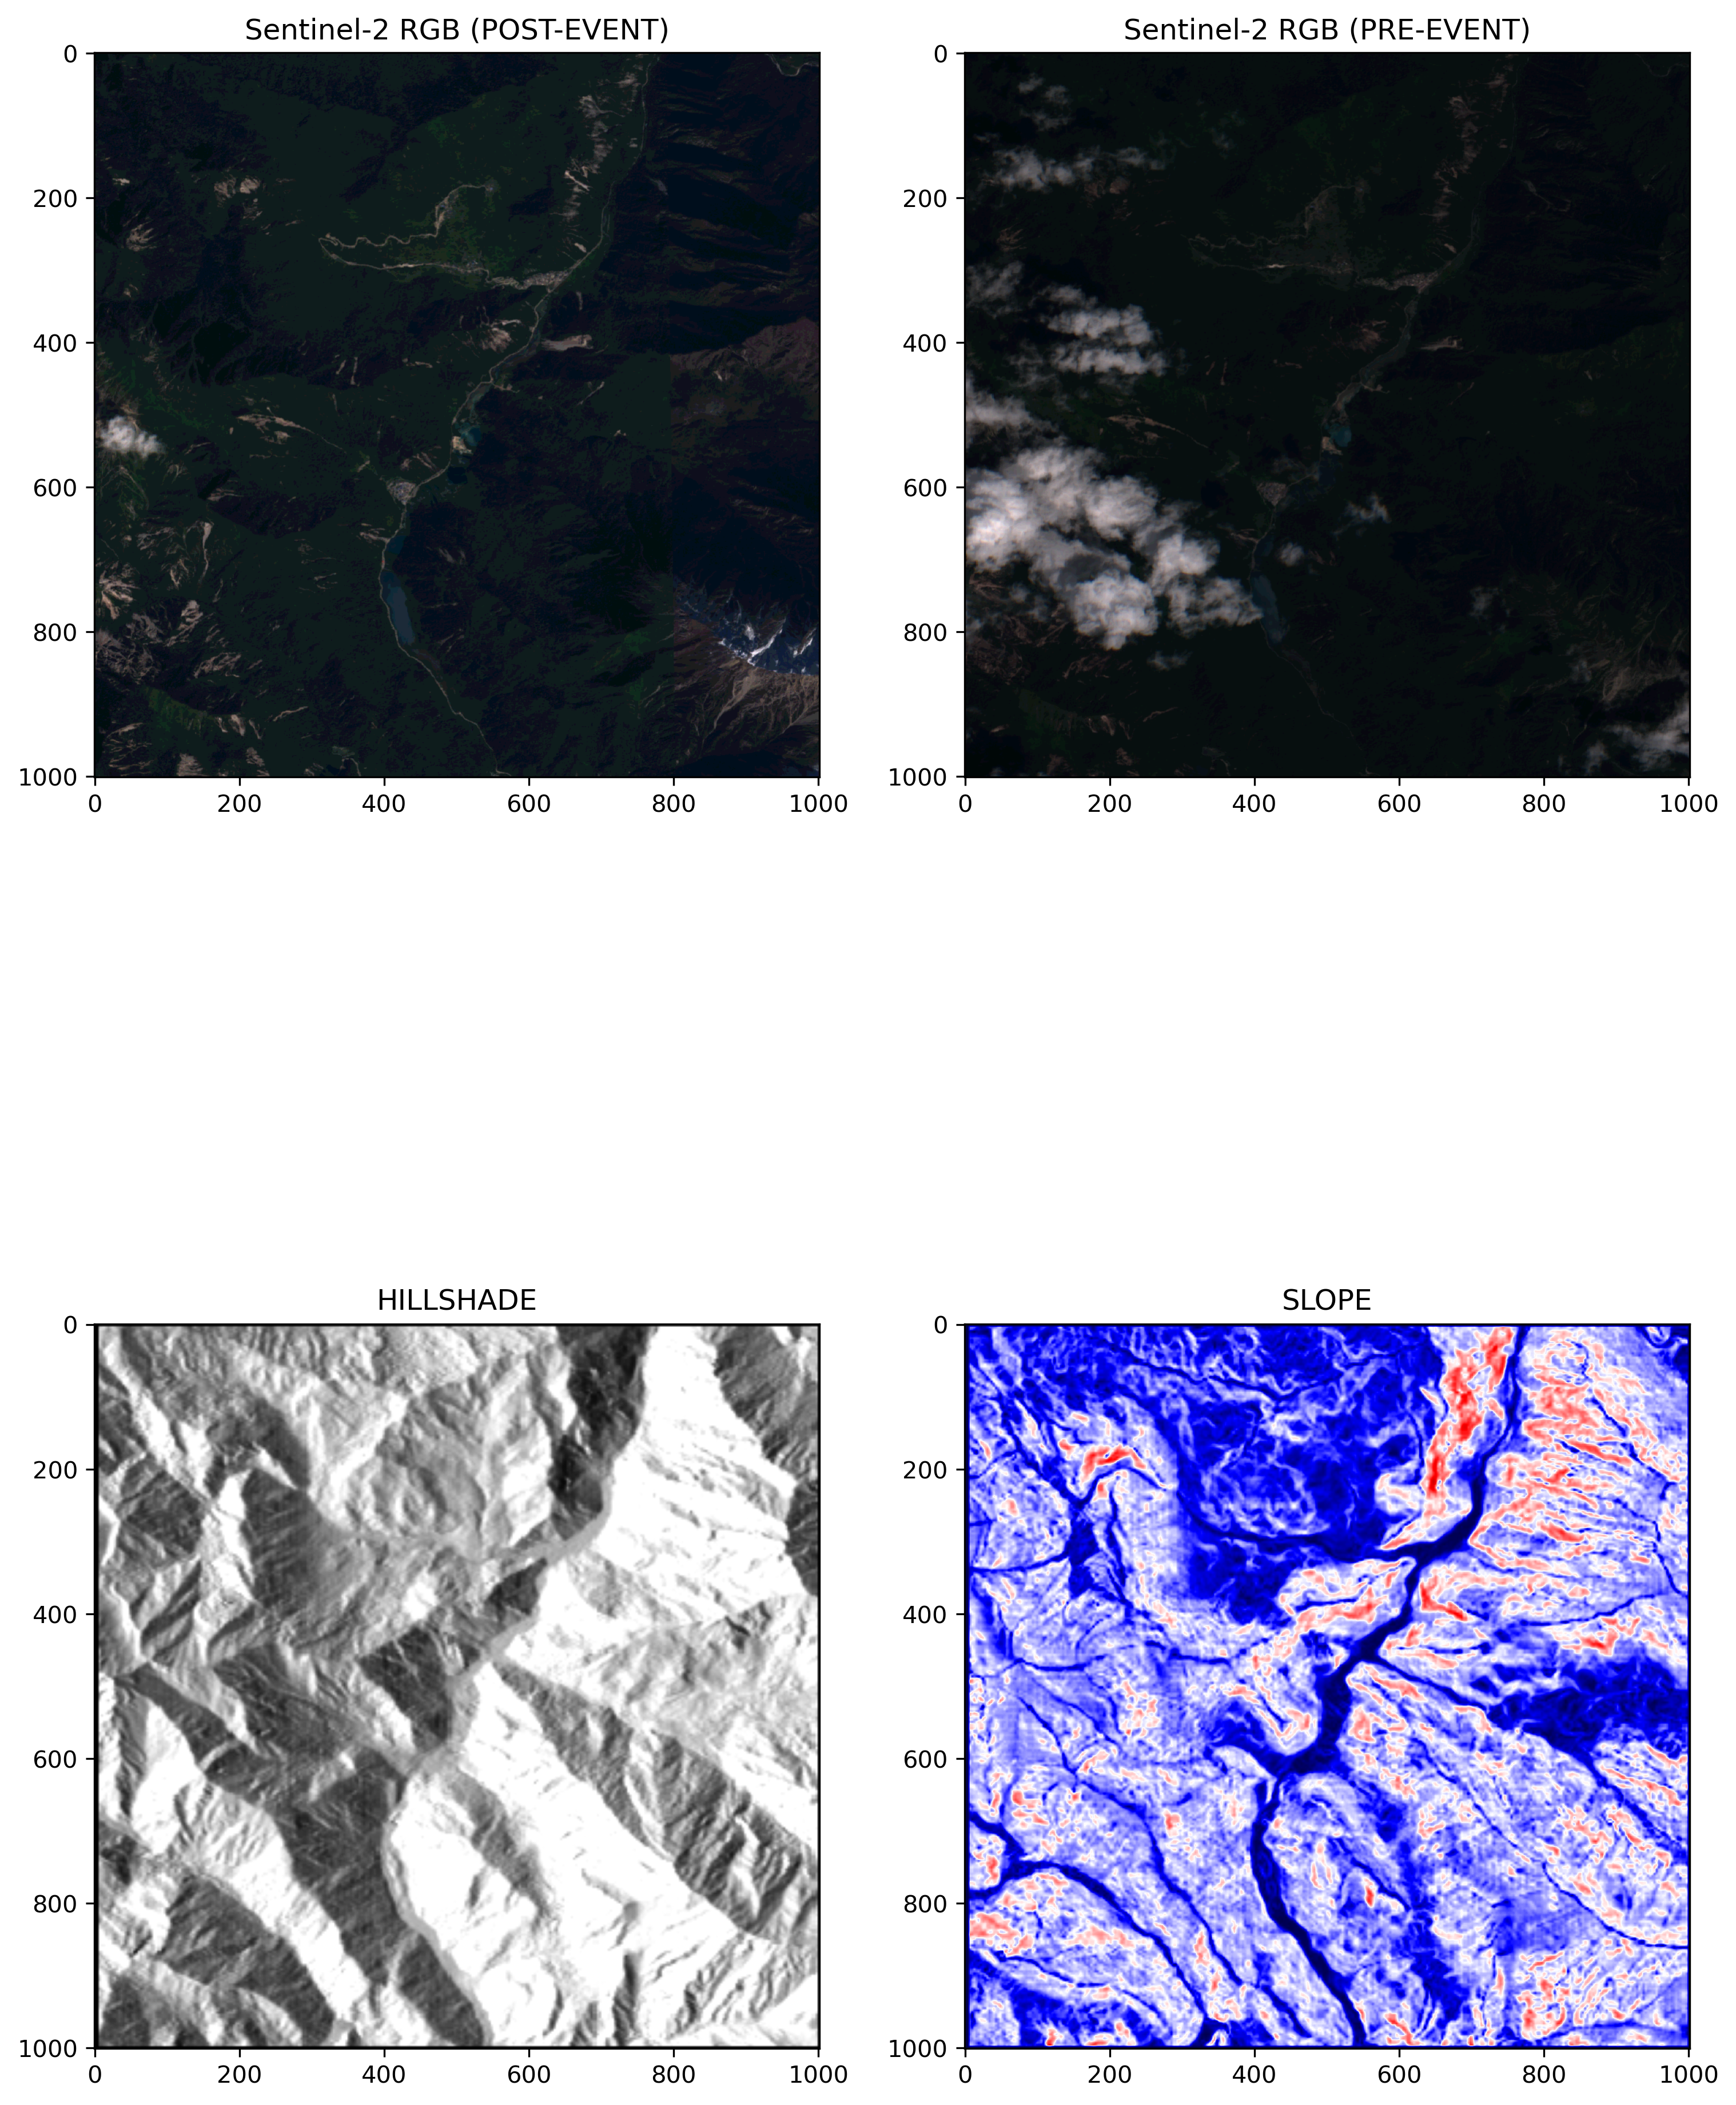

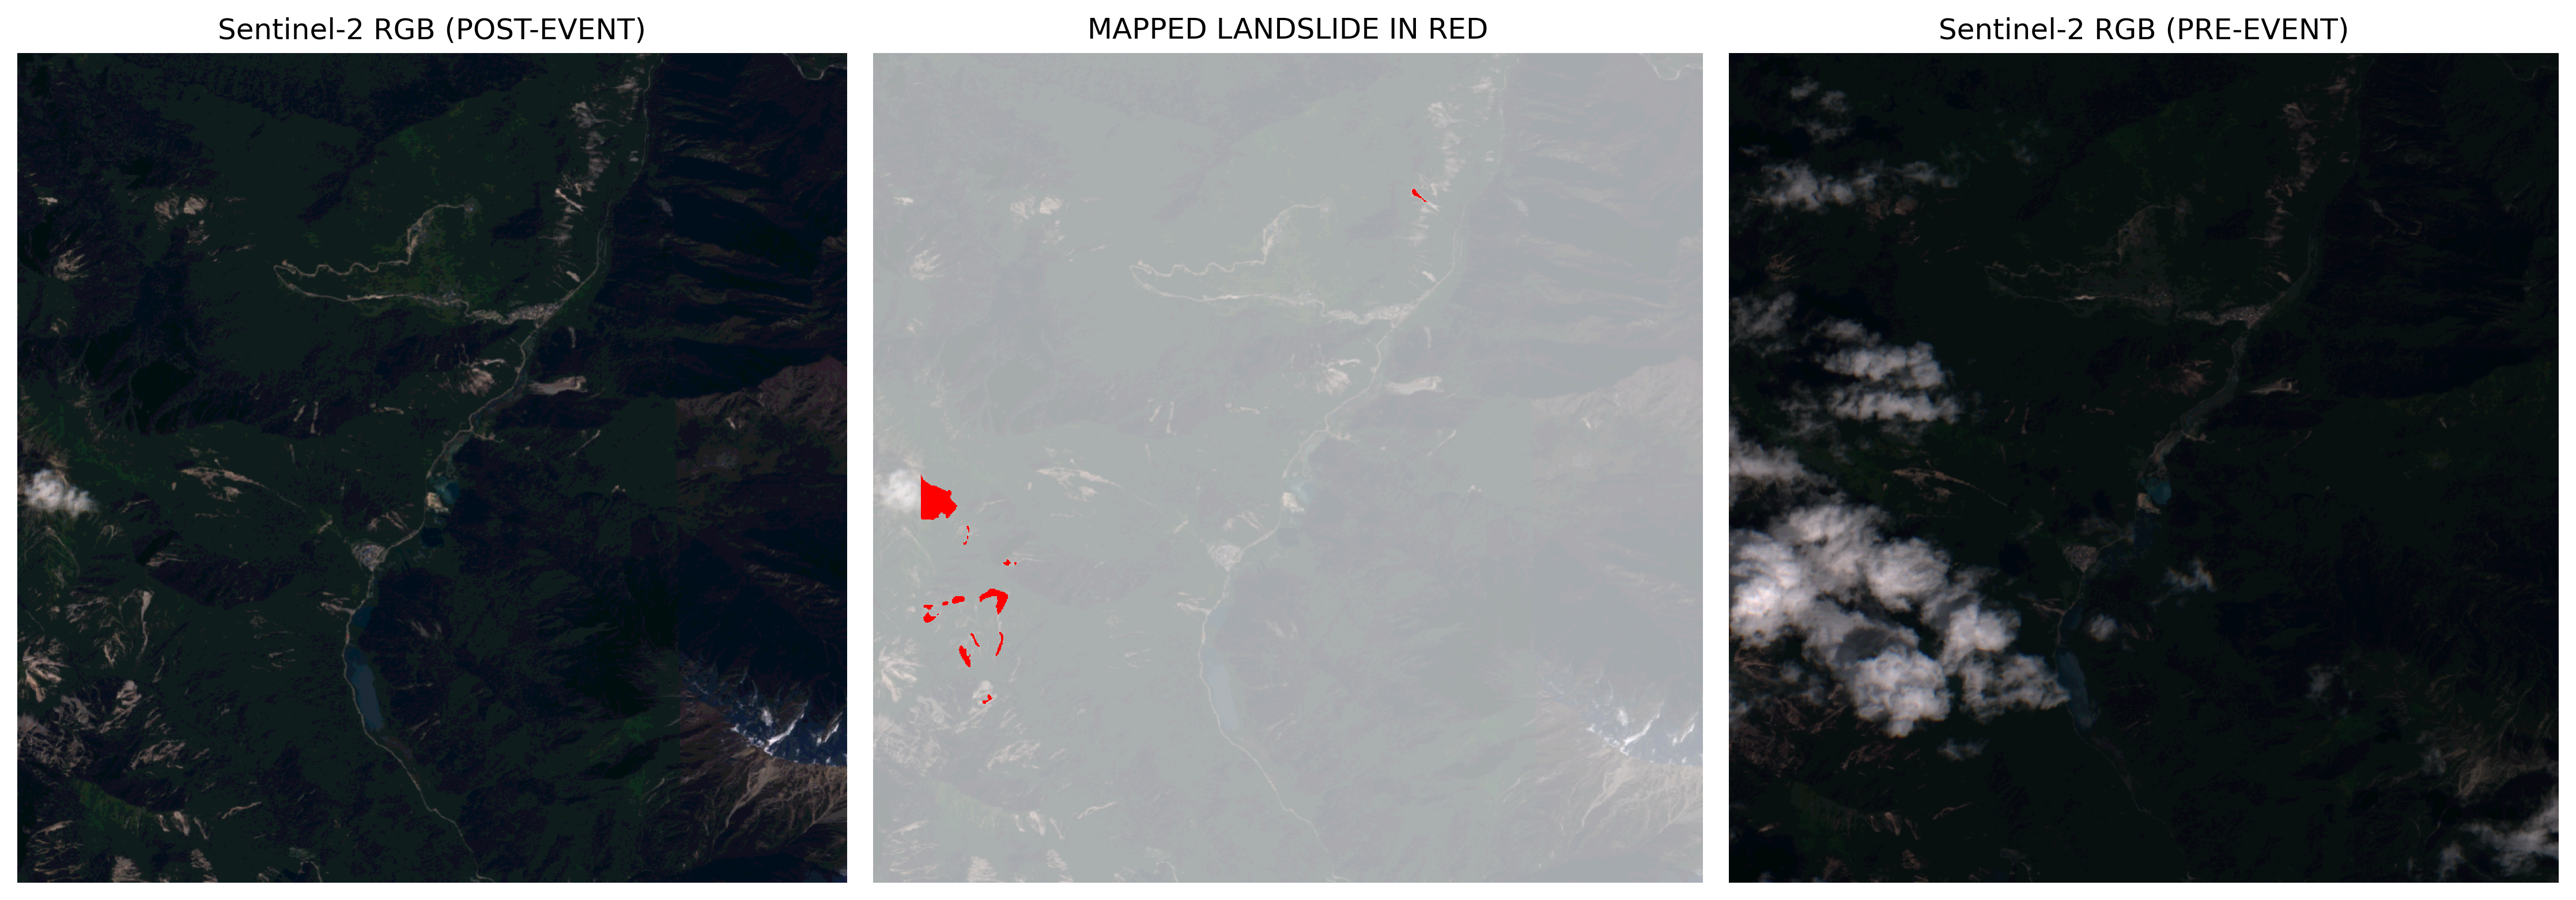

In [26]:
from landslide_sentry.landslide_mapping import generateLandsideMap
import os

data_path = "./raw_data/"

pre_path = os.path.join(data_path, "pre")
post_path = os.path.join(data_path, "post")
dem_path = os.path.join(data_path, "dem")

result_path = "./landslide_mapping"

generateLandsideMap("../model/M_ALL_006.hdf5", pre_path, post_path, dem_path, result_path, "./raw_data/aoi_S2.tif",  debug=True)
